<a href="https://colab.research.google.com/github/christopherhomen/talentotech/blob/main/Experiencia/Copia_de_regresion_lineal_simple_con_solucion_matricial_ejecutado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
x = [1,2,2,3,4,4,5,6]
y = [2,3,4,4,4,6,5,7]

d = {"y":y, "x":x}
df = pd.DataFrame(d)
df

,y,x
0,2,1
1,3,2
2,4,2
3,4,3
4,4,4
5,6,4
6,5,5
7,7,6


In [3]:
import numpy as np
df2=df.copy()
df2["y"]=np.ones(len(df))
df2

,y,x
0,1.0,1
1,1.0,2
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,4
6,1.0,5
7,1.0,6


In [4]:
X=np.array(df2)
X

array([[1., 1.],
       [1., 2.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 4.],
       [1., 5.],
       [1., 6.]])

In [5]:
Xt = X.T
Xt

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 2., 2., 3., 4., 4., 5., 6.]])

In [6]:
M=Xt@X
M

array([[  8.,  27.],
       [ 27., 111.]])

In [7]:
y=np.array(df[["y"]])
y

array([[2],
       [3],
       [4],
       [4],
       [4],
       [6],
       [5],
       [7]])

In [8]:
detM = np.linalg.det(M)
detM

np.float64(159.0)

In [9]:
inversa=np.linalg.inv(M)
inversa


array([[ 0.69811321, -0.16981132],
       [-0.16981132,  0.05031447]])

In [10]:
pinversa=np.linalg.pinv(M)
pinversa

array([[ 0.69811321, -0.16981132],
       [-0.16981132,  0.05031447]])

In [11]:
betas = inversa @ Xt @ y
betas

array([[1.50943396],
       [0.8490566 ]])

# Mas rapido:

Ver este link relacionado con la matriz pseudo inversa de Moore-Penrose:

https://chatgpt.com/share/68c0df00-15d8-800f-9b6b-61b0a212a247

In [12]:
import pandas as pd
x = [1,2,2,3,4,4,5,6]
y = [2,3,4,4,4,6,5,7]

d = {"x":x, "y":y}
df = pd.DataFrame(d)
df

,x,y
0,1,2
1,2,3
2,2,4
3,3,4
4,4,4
5,4,6
6,5,5
7,6,7


In [13]:
df2=df.copy()
df2["y"]=np.ones(len(df))
df2

,x,y
0,1,1.0
1,2,1.0
2,2,1.0
3,3,1.0
4,4,1.0
5,4,1.0
6,5,1.0
7,6,1.0


In [14]:
X=np.array(df2)
X.shape

(8, 2)

In [15]:
Xpinv= np.linalg.pinv(X)
Xpinv.shape

(2, 8)

In [16]:
y = np.array(df[["y"]])
y.shape

(8, 1)

In [17]:
betas = Xpinv @ y
print(betas.shape)
betas

(2, 1)


array([[0.8490566 ],
       [1.50943396]])

# Ojo la pseudo inversa de Moore-Penrose ya incluye todo (matrices no tienen que ser cuadradas y el det(AtA) puede ser cero)
(la inversa no lo hace directamente pues la matriz debe ser cuadrada, y si fuera cuadrada su det debe ser distinto de cero, ver mas abajo):

In [18]:
Xinv= np.linalg.inv(X)
Xinv.shape

LinAlgError: Last 2 dimensions of the array must be square

# Cálculo de Errores (manualmente)

In [19]:
df["ypred"] = X @ betas
df

,x,y,ypred
0,1,2,2.358491
1,2,3,3.207547
2,2,4,3.207547
3,3,4,4.056604
4,4,4,4.905660
5,4,6,4.905660
6,5,5,5.754717
7,6,7,6.603774


In [20]:
# error = y - ypred
df["y-ypred"] =  df["y"] - df["ypred"]
df

,x,y,ypred,y-ypred
0,1,2,2.358491,-0.358491
1,2,3,3.207547,-0.207547
2,2,4,3.207547,0.792453
3,3,4,4.056604,-0.056604
4,4,4,4.905660,-0.905660
5,4,6,4.905660,1.094340
6,5,5,5.754717,-0.754717
7,6,7,6.603774,0.396226


In [21]:
# error = y - ypred
df["error^2"] = df["y-ypred"]**2
df

,x,y,ypred,y-ypred,error^2
0,1,2,2.358491,-0.358491,0.128515
1,2,3,3.207547,-0.207547,0.043076
2,2,4,3.207547,0.792453,0.627981
3,3,4,4.056604,-0.056604,0.003204
4,4,4,4.905660,-0.905660,0.820221
5,4,6,4.905660,1.094340,1.197579
6,5,5,5.754717,-0.754717,0.569598
7,6,7,6.603774,0.396226,0.156995


In [22]:
error_cuad_total = df["error^2"].sum()
error_cuad_total

np.float64(3.5471698113207553)

In [23]:
# MSE = error_cuad_medio
mse = error_cuad_total / len(df)
mse

np.float64(0.4433962264150944)

In [24]:
rmse = mse**(1/2)
rmse

np.float64(0.6658800390574074)

# Histograma de errores

<Axes: >

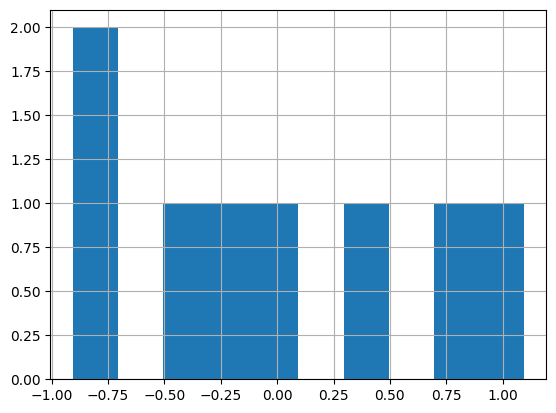

In [25]:
df["y-ypred"].hist()

# Actividad de consulta práctica hasta las 7:40 pm:

1. Calcular el error absoluto total y el MAE (error absoluto medio). Ayuda: usar el df y extenderlo como se hizo para el cuadratico.

2. MAPE

3. Otras métricas: R2, entre otras.

*Recuerden:

Replicar lo anterior en cada dataset (el del video de youtube, el de las ventas y reg mutiple del link donde está la formula del OLS, y si alcanzan pueden ir replicando en su datset del caso de estudio)


In [26]:
# Calcular el error absoluto total
df["abs_error"] = abs(df["y-ypred"])
total_abs_error = df["abs_error"].sum()
print(f"El error absoluto total es: {total_abs_error}")
df

El error absoluto total es: 4.56603773584906


,x,y,ypred,y-ypred,error^2,abs_error
0,1,2,2.358491,-0.358491,0.128515,0.358491
1,2,3,3.207547,-0.207547,0.043076,0.207547
2,2,4,3.207547,0.792453,0.627981,0.792453
3,3,4,4.056604,-0.056604,0.003204,0.056604
4,4,4,4.905660,-0.905660,0.820221,0.905660
5,4,6,4.905660,1.094340,1.197579,1.094340
6,5,5,5.754717,-0.754717,0.569598,0.754717
7,6,7,6.603774,0.396226,0.156995,0.396226


In [27]:
# Calcular el MAE (error absoluto medio)
mae = total_abs_error / len(df)
print(f"El MAE es: {mae}")

El MAE es: 0.5707547169811324


In [29]:
# Calcular el MAPE (Error porcentual absoluto medio)

# Calcular el error porcentual absoluto para cada punto de datos
# Se evita la división por cero en caso de que los valores reales sean cero
df["abs_percentage_error"] = abs((df["y"] - df["ypred"]) / df["y"]) * 100

# Calcular el promedio de los errores porcentuales absolutos para obtener el MAPE
mape = df["abs_percentage_error"].mean()
print(f"El MAPE es: {mape}")

# Mostrar el DataFrame con la nueva columna de error porcentual absoluto
df

El MAPE es: 13.463050314465423


,x,y,ypred,y-ypred,error^2,abs_error,abs_percentage_error
0,1,2,2.358491,-0.358491,0.128515,0.358491,17.924528
1,2,3,3.207547,-0.207547,0.043076,0.207547,6.918239
2,2,4,3.207547,0.792453,0.627981,0.792453,19.811321
3,3,4,4.056604,-0.056604,0.003204,0.056604,1.415094
4,4,4,4.905660,-0.905660,0.820221,0.905660,22.641509
5,4,6,4.905660,1.094340,1.197579,1.094340,18.238994
6,5,5,5.754717,-0.754717,0.569598,0.754717,15.094340
7,6,7,6.603774,0.396226,0.156995,0.396226,5.660377


In [30]:
# Calcular el R-squared (Coeficiente de determinación)

# Calcular la media de los valores reales de 'y'
y_mean = df["y"].mean()

# Calcular la suma total de cuadrados (TSS - Total Sum of Squares)
# Esta es la suma de los cuadrados de las diferencias entre los valores reales de 'y' y su media
tss = ((df["y"] - y_mean) ** 2).sum()

# La suma de cuadrados de los residuos (RSS - Residual Sum of Squares) ya la tenemos calculada como error_cuad_total
rss = error_cuad_total

# Calcular el R-squared
# R2 = 1 - (RSS / TSS)
r2 = 1 - (rss / tss)

print(f"El R-squared es: {r2}")

El R-squared es: 0.8015569336324053
